# Main — Interpretabilidad con LIME & SHAP
Este notebook ejecuta el pipeline completo y muestra los resultados (métricas, gráficos SHAP y LIME, e informe).

**Secuencia:**
1) `python -m src.models.train`
2) `python -m scripts.evaluate`
3) `python -m scripts.explain_shap`
4) `python -m scripts.explain_lime`
5) `python -m scripts.make_report`

Nota: Ejecuta este notebook desde la **raíz del proyecto** (donde están `src/` y `scripts/`).


In [2]:
# Instalar dependencias si no usas conda (ej. en Google Colab o entorno limpio)
!pip install numpy pandas matplotlib scikit-learn joblib shap lime


In [9]:
# ⬅️ PON ESTA CELDA AL INICIO DEL NOTEBOOK
from pathlib import Path
import os, sys

# Si el .ipynb está en .../notebook, sube un nivel a la raíz del proyecto
ROOT = Path().resolve().parents[0]   # carpeta padre de /notebook
# Alternativa genérica:
# ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path().resolve().parents[0]

# Cambia el directorio de trabajo del kernel (afecta también a !python)
os.chdir(ROOT)

# Asegura que la raíz del proyecto esté en sys.path para imports tipo "src.*"
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

print("CWD:", Path.cwd())
print("Tiene src?:", (ROOT/"src").exists(), " | Tiene scripts?:", (ROOT/"scripts").exists())



CWD: /home/mparraf/myprojects/EspecialidadMachineLearning/Modulo9EvalModularMarcoParra
Tiene src?: True  | Tiene scripts?: True


## 1) Entrenamiento

In [10]:
!python -m src.models.train

Modelo guardado en: models/model_rf.joblib
Métricas guardadas en: outputs/metrics.txt


## 2) Métricas (evaluate)

In [11]:
!python -m scripts.evaluate

== Métricas de evaluación (test) ==
Accuracy: 0.908
F1-score: 0.919

== Classification report ==
              precision    recall  f1-score   support

           0      0.922     0.866     0.893        82
           1      0.897     0.941     0.919       102

    accuracy                          0.908       184
   macro avg      0.910     0.904     0.906       184
weighted avg      0.908     0.908     0.907       184



## 3) Explicaciones SHAP

In [12]:
!python -m scripts.explain_shap

SHAP listo: figuras en images/ y reporte en reports/ethics_bias_shap.md


## 4) Explicaciones LIME

In [13]:
!python -m scripts.explain_lime

LIME listo: figuras en images/


## 5) Generar informe consolidado

In [14]:
!python -m scripts.make_report

Reporte consolidado: reports/informe_interpretabilidad.md


## 6) Visualización de resultados dentro del notebook

== Métricas de evaluación (test) ==
Accuracy: 0.908
F1-score: 0.919

== Classification report ==
              precision    recall  f1-score   support

           0      0.922     0.866     0.893        82
           1      0.897     0.941     0.919       102

    accuracy                          0.908       184
   macro avg      0.910     0.904     0.906       184
weighted avg      0.908     0.908     0.907       184



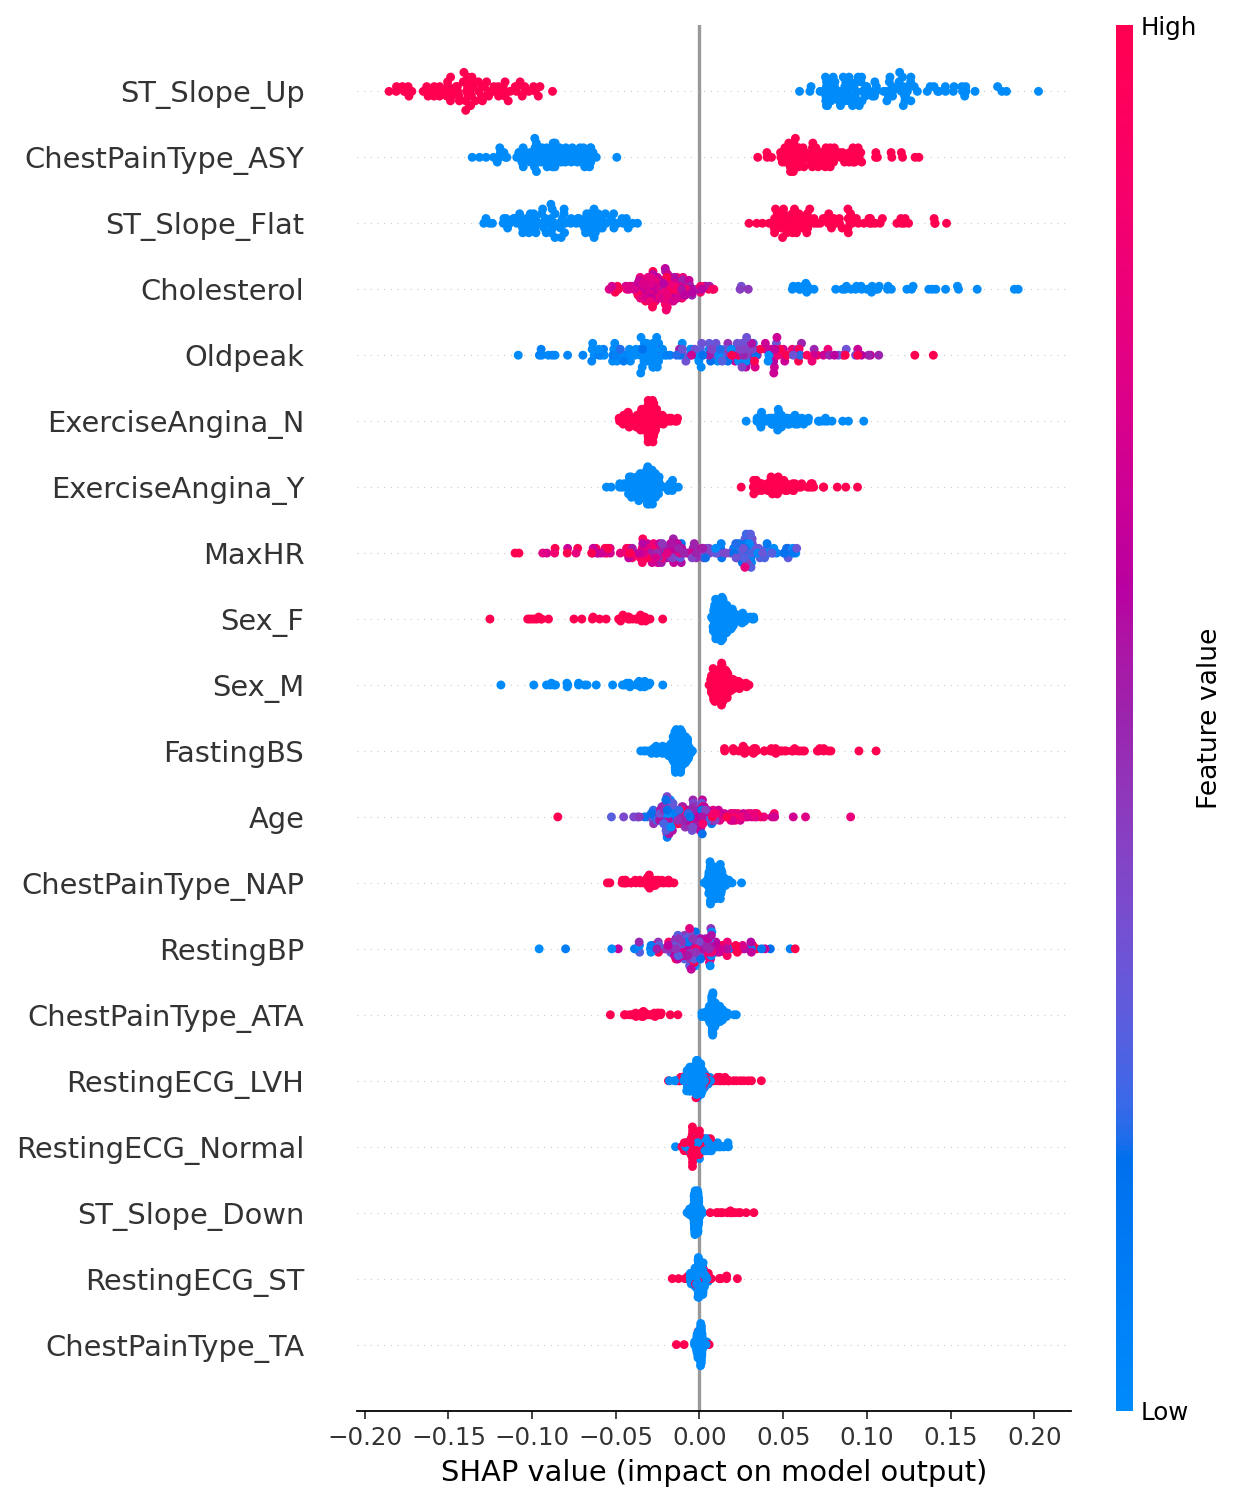

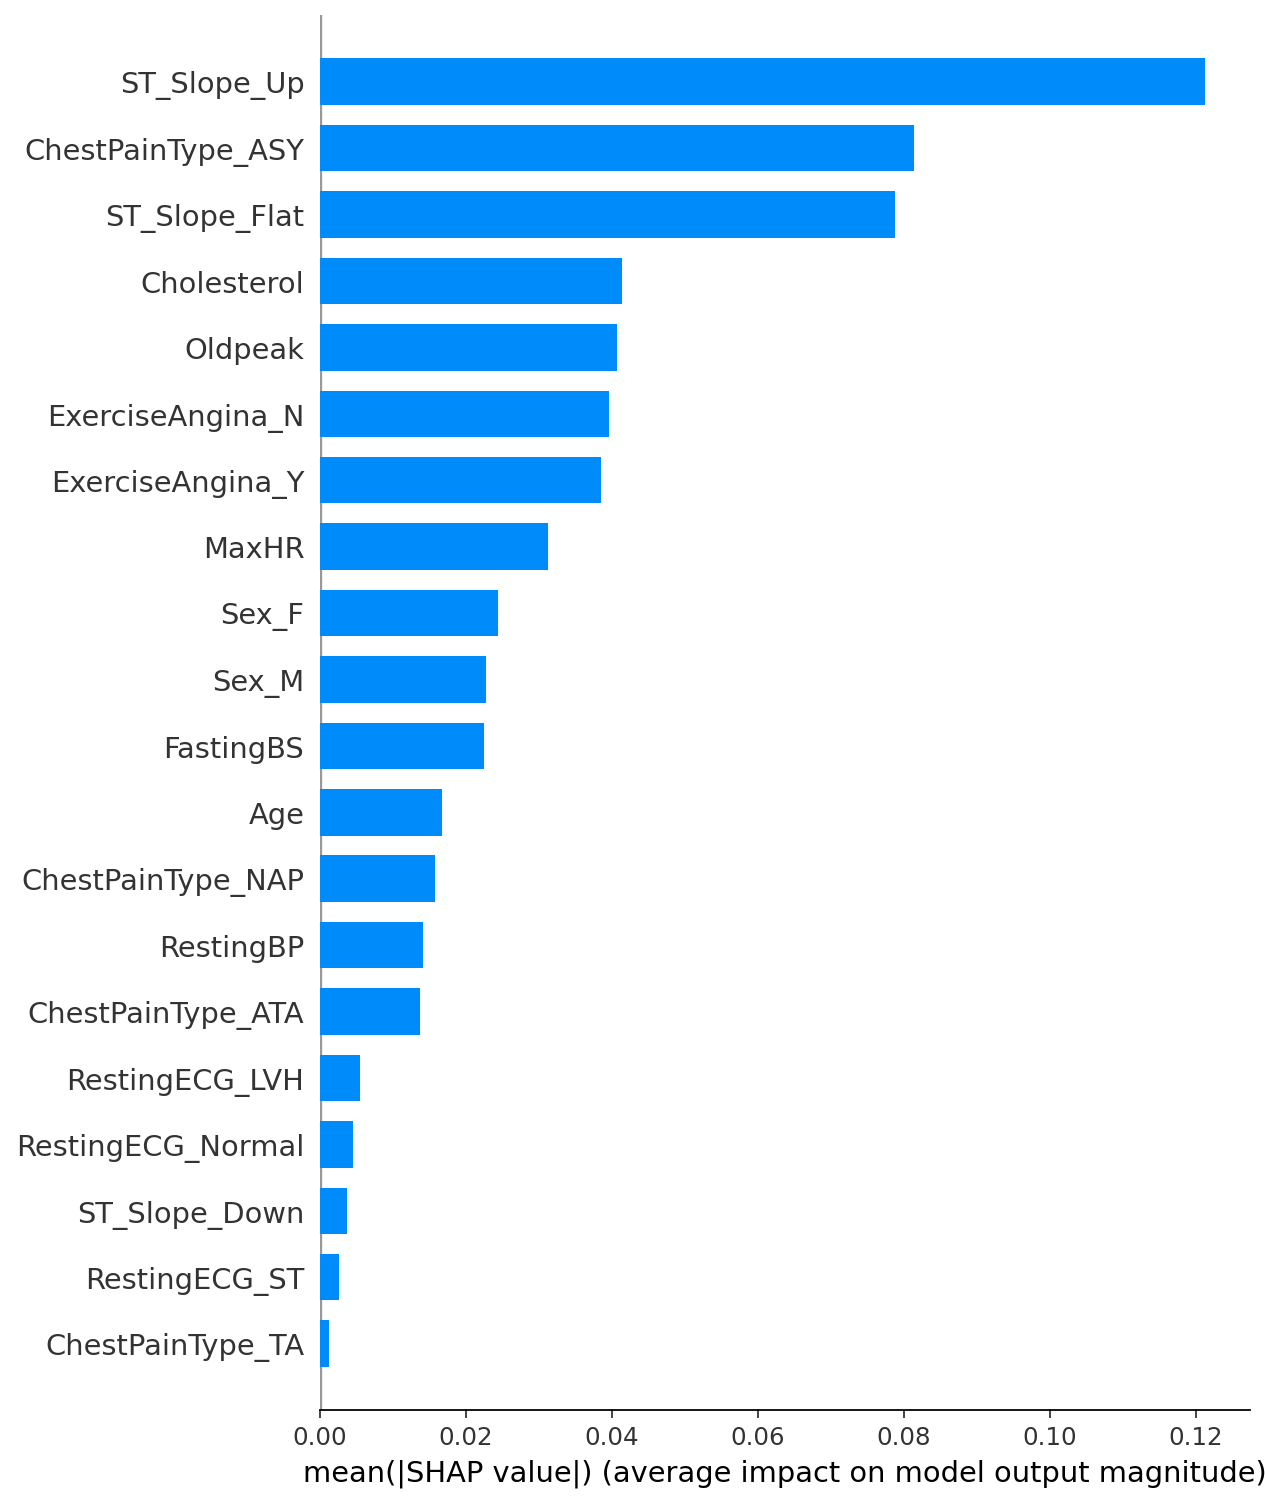

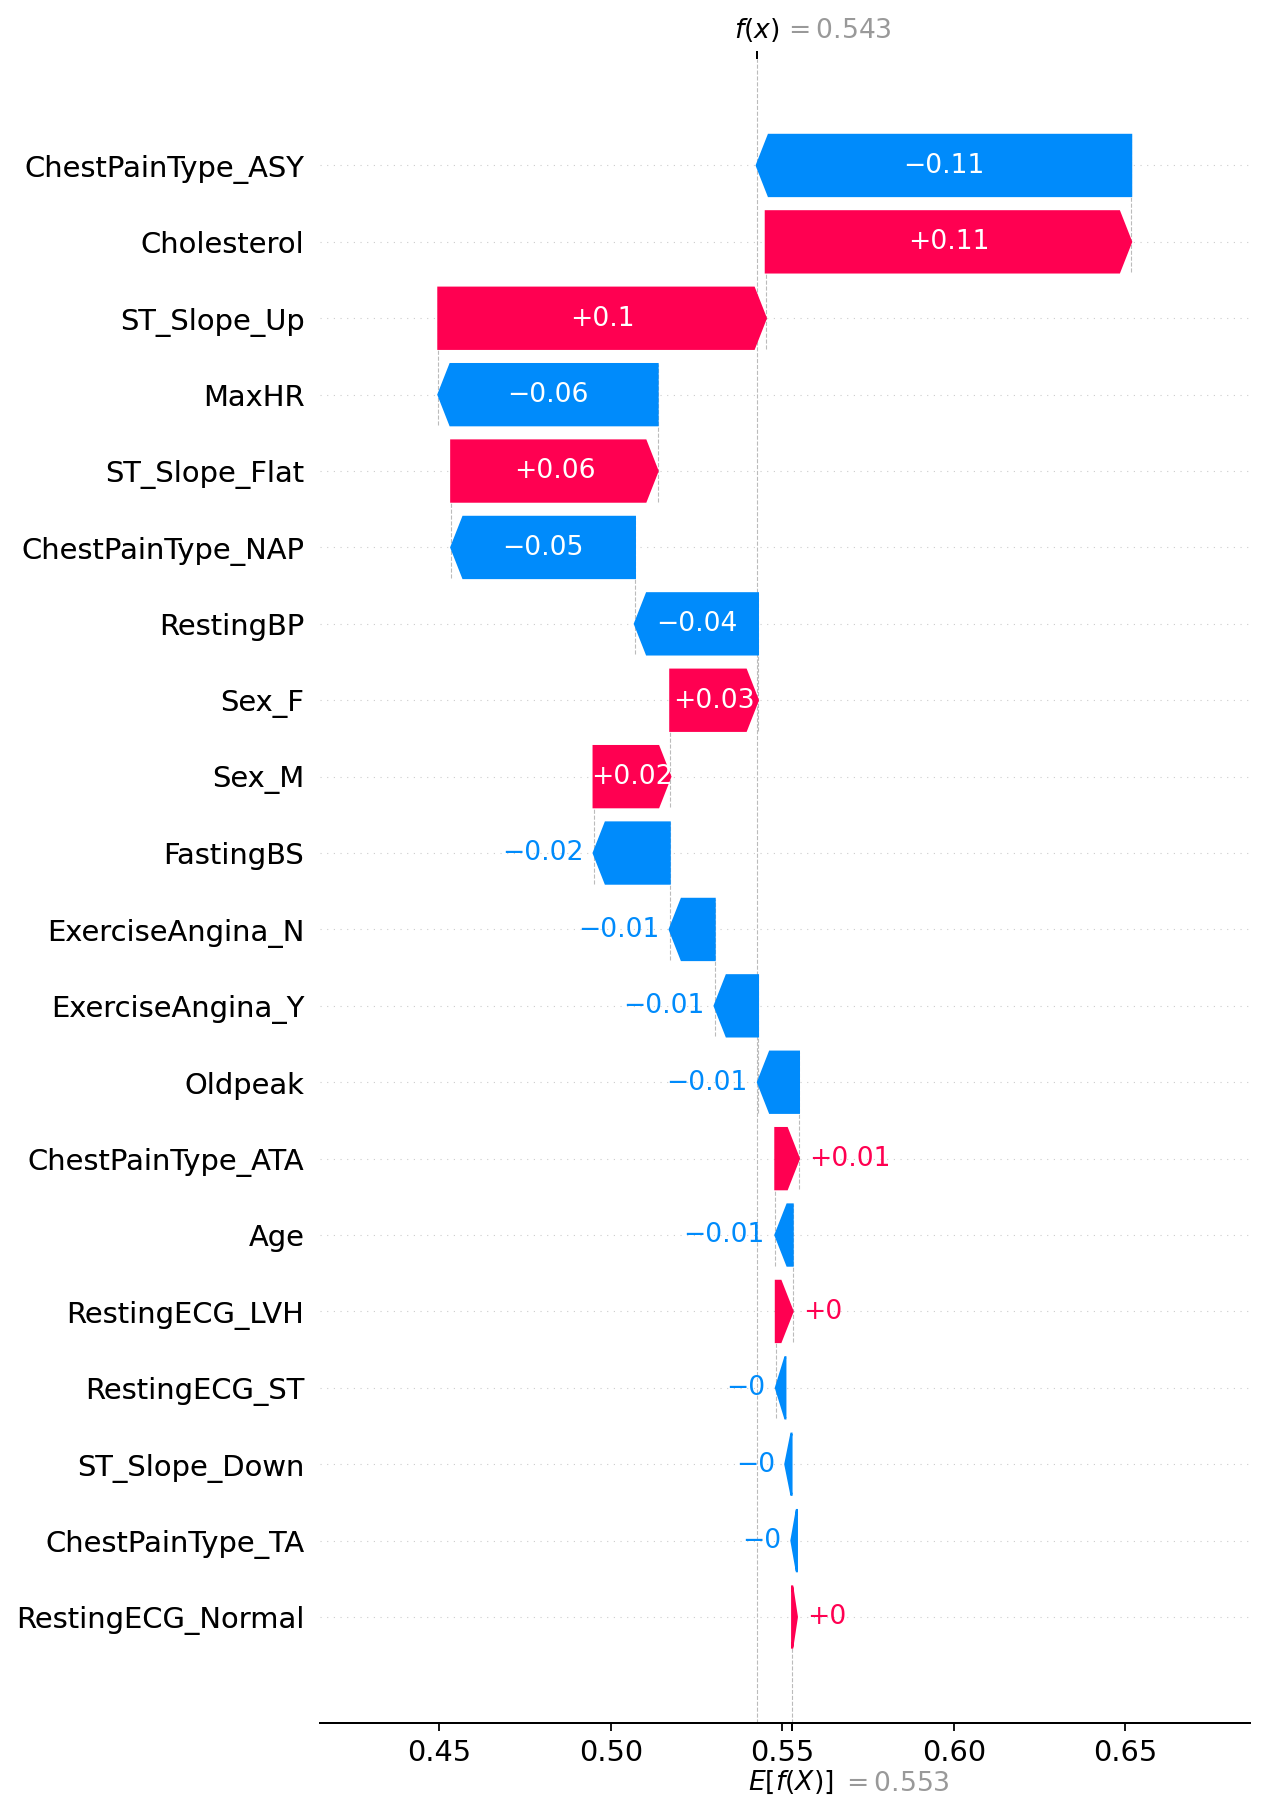

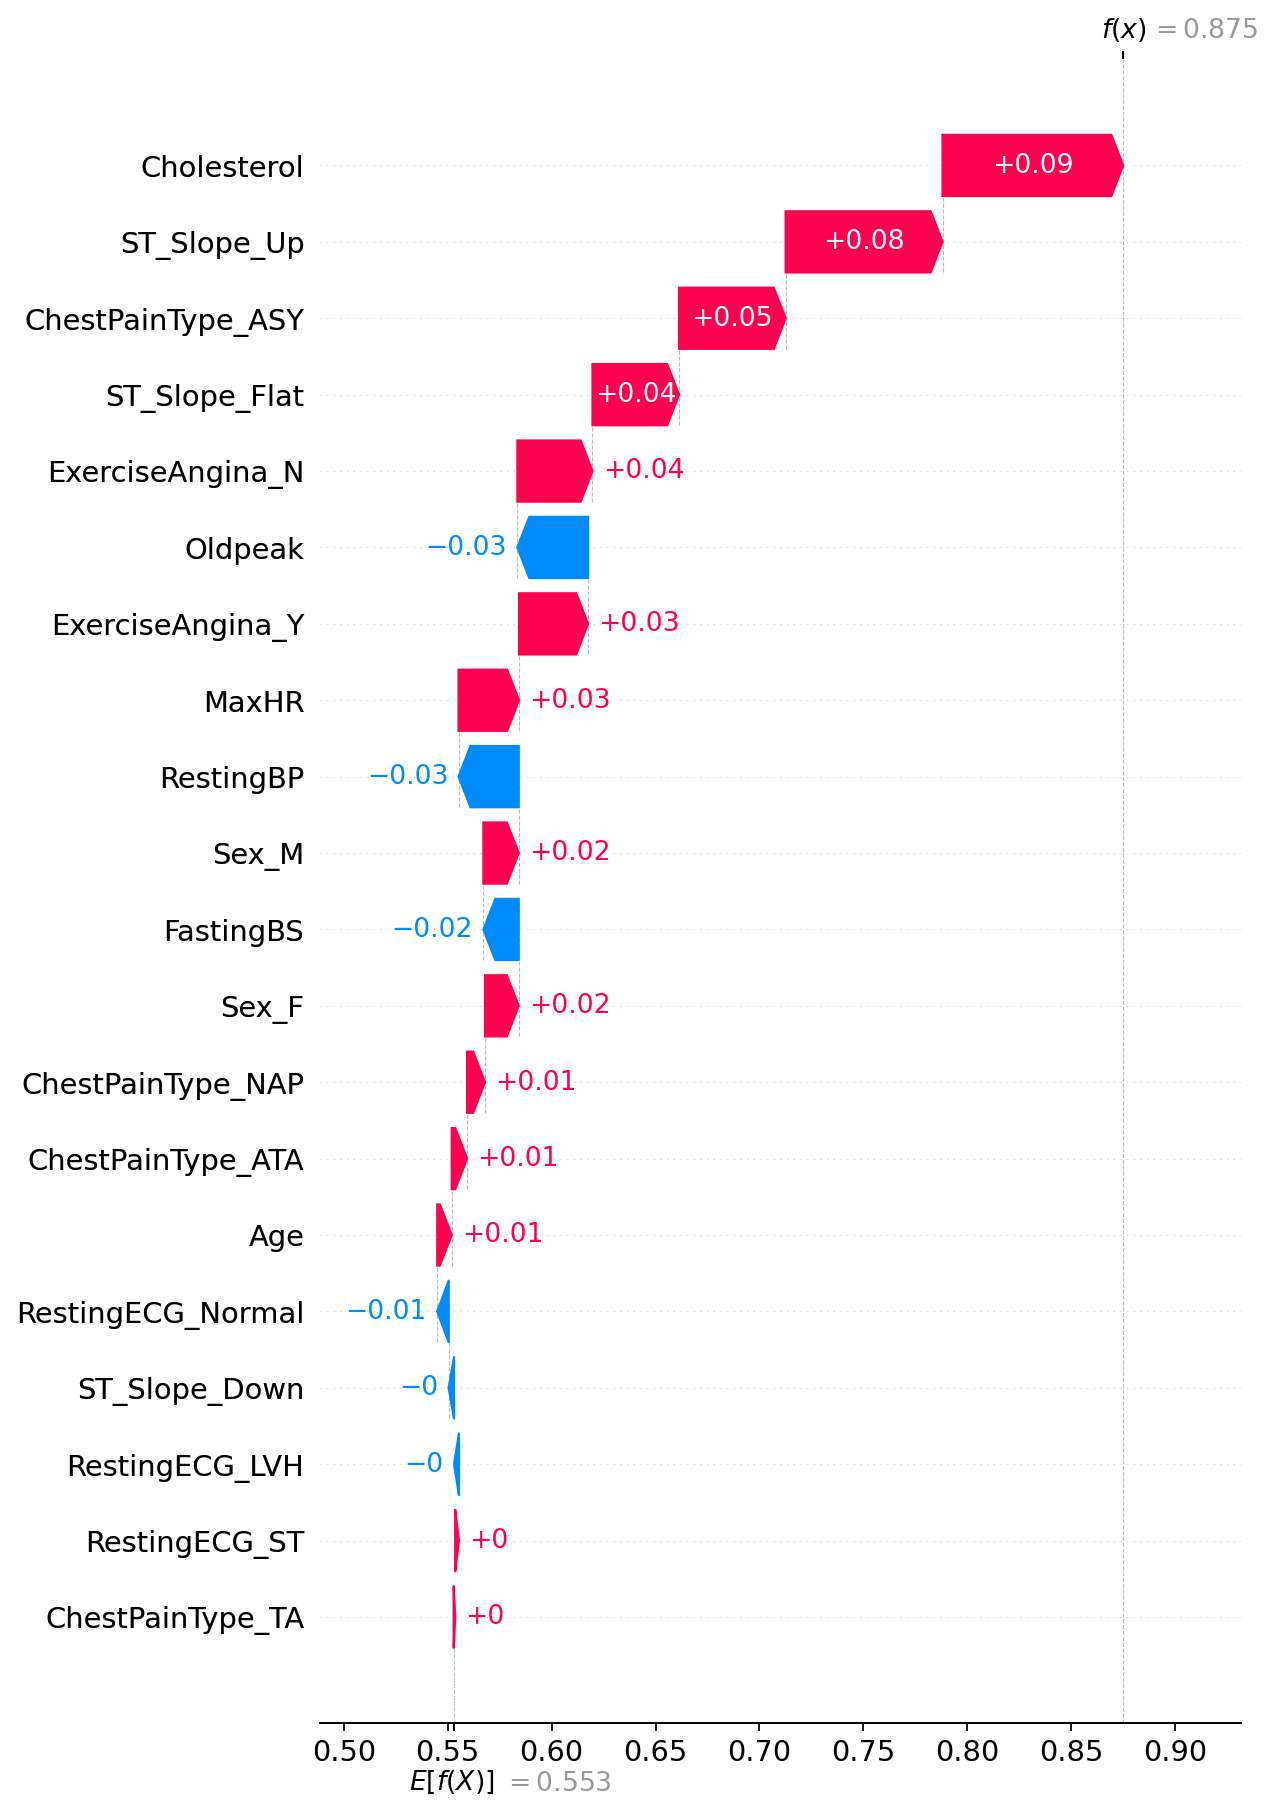

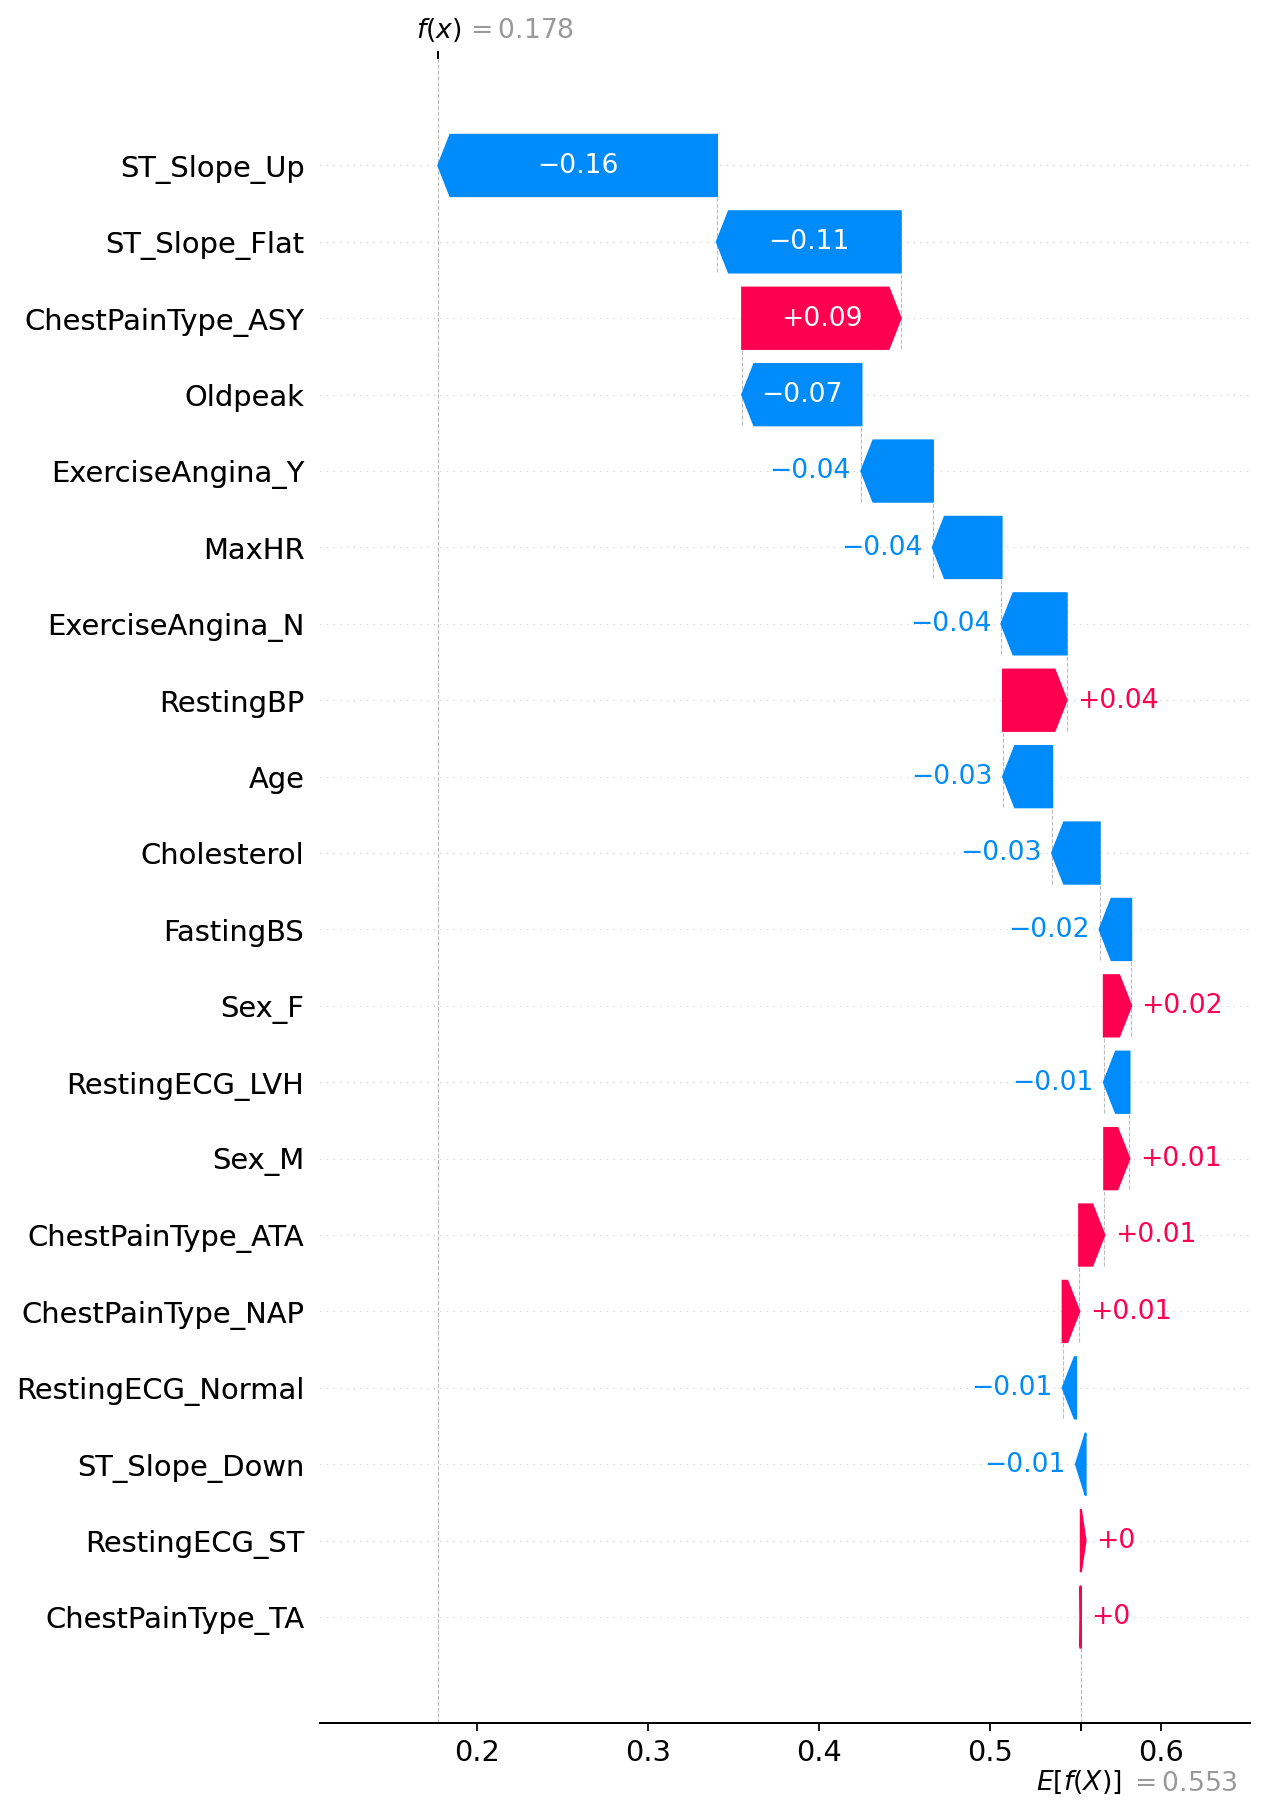

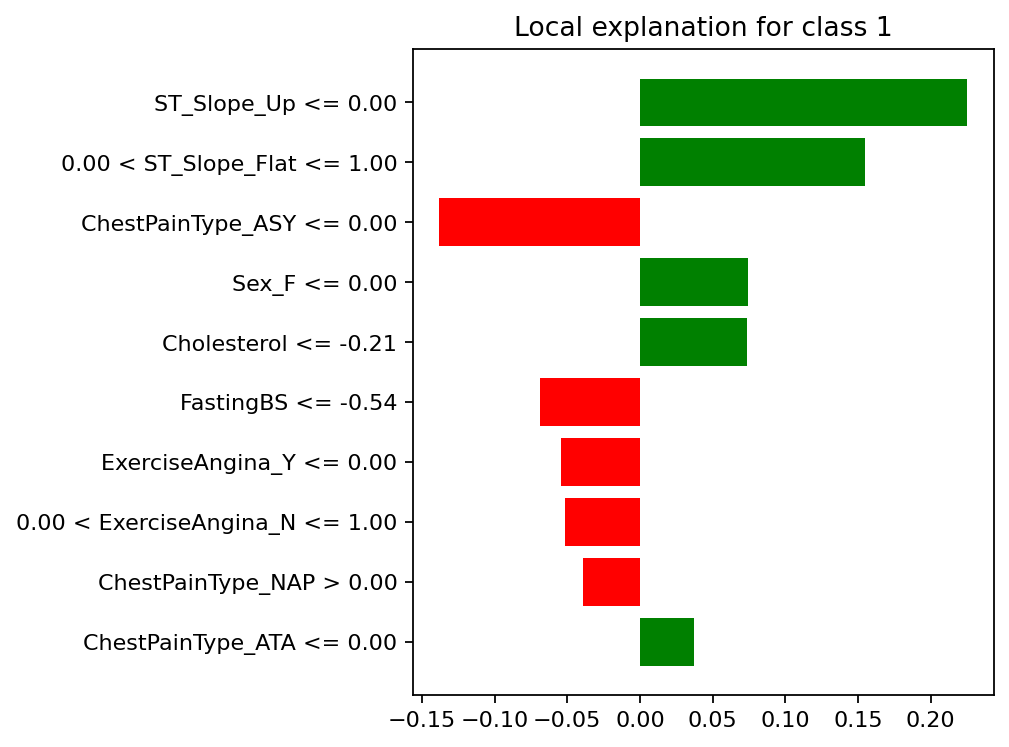

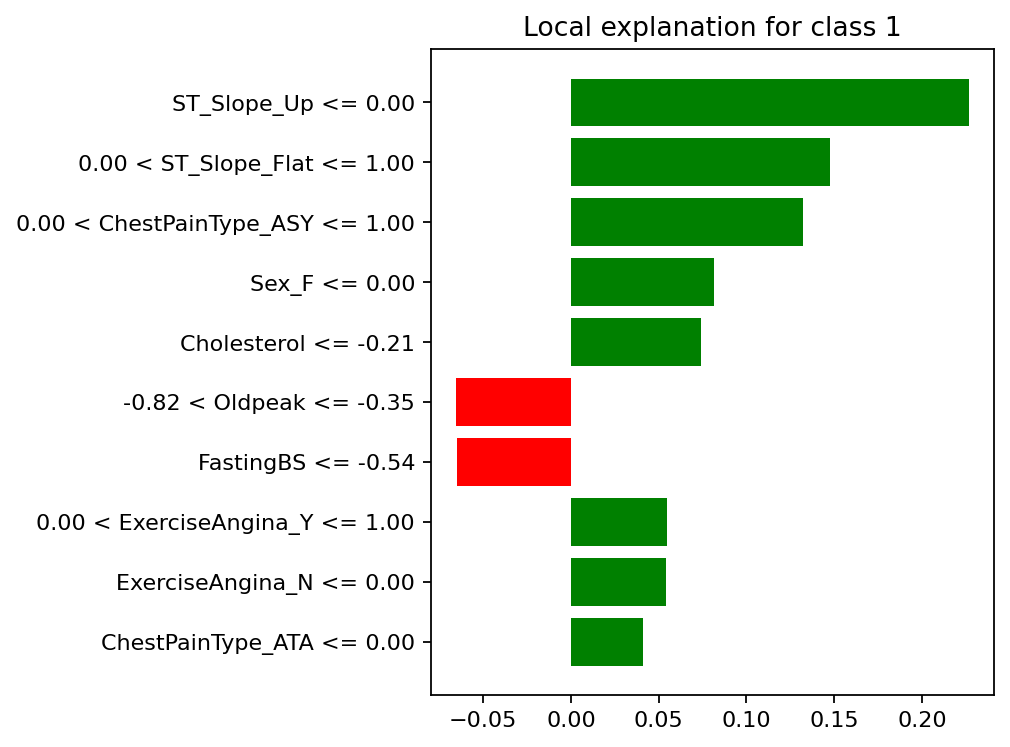

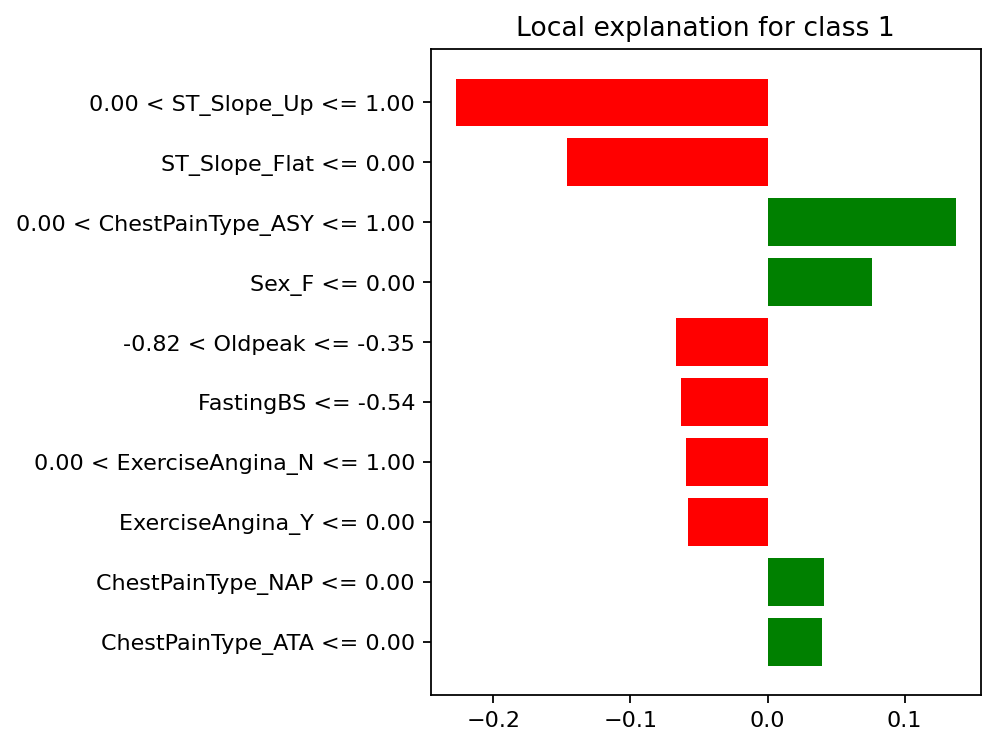

# Informe — Interpretabilidad con LIME & SHAP
\n\n## 1) Carga y exploración de datos\n\n
- Dataset: Heart Failure Prediction (Kaggle).
- Limpieza mínima: `dropna`, casting categóricas.
- Variables potencialmente sensibles: `Sex` (u otras relacionadas).
\n\n## 2) Construcción y evaluación del modelo\n\n
**Métricas (test):**

```
== Métricas de evaluación (test) ==
Accuracy: 0.908
F1-score: 0.919

== Classification report ==
              precision    recall  f1-score   support

           0      0.922     0.866     0.893        82
           1      0.897     0.941     0.919       102

    accuracy                          0.908       184
   macro avg      0.910     0.904     0.906       184
weighted avg      0.908     0.908     0.907       184

```
\n\n## 3) SHAP — Explicaciones\n\n
Gráficos globales y locales:
![shap_summary_beeswarm.png](../images/shap_summary_beeswarm.png)
![shap_summary_bar.png](../images/shap_summary_bar.png)
![shap_waterfall_case_1.png](../images/shap_waterfall_case_1.png)
![shap_waterfall_case_2.png](../images/shap_waterfall_case_2.png)
![shap_waterfall_case_3.png](../images/shap_waterfall_case_3.png)

**Análisis de posibles sesgos (SHAP):**

# Análisis de sesgo (SHAP — global)

| feature | mean(|SHAP|) |
|---|---:|
| ST_Slope_Up | 0.121266 |
| ChestPainType_ASY | 0.081333 |
| ST_Slope_Flat | 0.078826 |
| Cholesterol | 0.041367 |
| Oldpeak | 0.040753 |
| ExerciseAngina_N | 0.039563 |
| ExerciseAngina_Y | 0.038557 |
| MaxHR | 0.031171 |
| Sex_F | 0.024441 |
| Sex_M | 0.022768 |
| FastingBS | 0.022502 |
| Age | 0.016741 |
| ChestPainType_NAP | 0.015760 |
| RestingBP | 0.014108 |
| ChestPainType_ATA | 0.013694 |
| RestingECG_LVH | 0.005544 |
| RestingECG_Normal | 0.004557 |
| ST_Slope_Down | 0.003679 |
| RestingECG_ST | 0.002592 |
| ChestPainType_TA | 0.001212 |

*Revisar variables potencialmente sensibles (ej. `Sex`).*

\n\n## 4) LIME — Explicaciones locales\n\n
![lime_explanation_case_1.png](../images/lime_explanation_case_1.png)
![lime_explanation_case_2.png](../images/lime_explanation_case_2.png)
![lime_explanation_case_3.png](../images/lime_explanation_case_3.png)
\n\n## 5) Análisis de sesgo y ética\n\n
- Revisar si `Sex` (u otra variable sensible) tiene peso desproporcionado.
- Mitigación potencial: balanceo, eliminación o anonimización de variables, regularización, ajuste de umbral, post-procesamiento de fairness.
- Riesgo sin interpretabilidad: decisiones clínicas injustas o no auditables.
\n\n## 6) Propuesta de mejora\n\n
- Evaluar otro algoritmo (e.g., XGBoost) y comparar métricas + explicaciones.
- Ajustar preprocesamiento (codificación, estandarización, manejo de outliers).
- Re-entrenar sin variables sensibles y comparar desempeño/explicaciones.

In [15]:
from IPython.display import display, Markdown, Image
from pathlib import Path

# Mostrar métricas
metrics_path = Path('outputs/metrics.txt')
if metrics_path.exists():
    print(metrics_path.read_text(encoding='utf-8'))
else:
    print('[!] No se encontró outputs/metrics.txt')

# Mostrar imágenes SHAP
for name in ['shap_summary_beeswarm.png','shap_summary_bar.png',
             'shap_waterfall_case_1.png','shap_waterfall_case_2.png','shap_waterfall_case_3.png']:
    p = Path('images')/name
    if p.exists():
        display(Image(filename=str(p)))
    else:
        print(f'[!] No existe {p}')

# Mostrar imágenes LIME
for name in ['lime_explanation_case_1.png','lime_explanation_case_2.png','lime_explanation_case_3.png']:
    p = Path('images')/name
    if p.exists():
        display(Image(filename=str(p)))
    else:
        print(f'[!] No existe {p}')

# Mostrar informe consolidado
md_path = Path('reports/informe_interpretabilidad.md')
if md_path.exists():
    display(Markdown(md_path.read_text(encoding='utf-8')))
else:
    print('[!] No se encontró reports/informe_interpretabilidad.md')
